<a href="https://colab.research.google.com/github/etrh/Image_Processing/blob/main/Peak_Area_Quantification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim**. calculate the total area under white peaks, so that peaks from different images can be quantified and compared. Dashed lines must not be included in the calculation of peak areas.

![alt text](https://i.stack.imgur.com/SzocE.png)

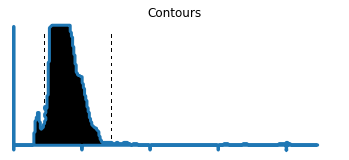

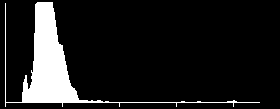

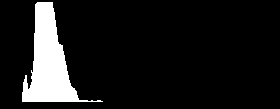

In [ ]:
#### Let's do a few quick tests and get to know our dataset better

from skimage import color, measure, filters, io
import matplotlib.pyplot as plt

sample_test_image = io.imread('https://i.stack.imgur.com/SzocE.png')

sample_test_image = color.rgb2gray(sample_test_image)
thresh = filters.threshold_otsu(sample_test_image)
binary = sample_test_image > thresh
contours = measure.find_contours(binary, 0.8)

plt.figure()
rcontour = contours[0]
plt.plot(rcontour[:, 1], rcontour[:, 0], linewidth=3)
plt.imshow(sample_test_image, interpolation='nearest', cmap='gray_r')
plt.title('Contours')
plt.axis('off')
plt.show()

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def process_and_show(img):
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  ret,gray = cv2.threshold(gray,127,255,0)
  gray2 = gray.copy()

  contours, hier = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours:
    if not 200<cv2.contourArea(cnt)<5000:
      (x,y,w,h) = cv2.boundingRect(cnt)
      cv2.rectangle(gray2,(x,y),(x+w,y+h),0,-1)
  
  cv2_imshow(gray2)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

!wget -q https://i.stack.imgur.com/SzocE.png
img = cv2.imread('SzocE.png')
img_remove_axes = img.copy()
img_remove_axes[np.all(img_remove_axes == (150., 100., 225.), axis=-1)] = (0,0,0)

process_and_show(img) ### dashed lines are removed (although the left dashed lines is still partially there), but axes stays
process_and_show(img_remove_axes) ### axes removed, dashed lines removed, but some of the small peaks are also removed!

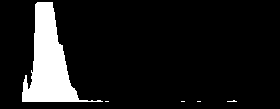

In [ ]:
### Second plot above is already pretty close.. 
### Let's remove the axes using the index of pink pixels in the numpy array

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('SzocE.png')
img_remove_axes = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,gray = cv2.threshold(gray,127,255,0)
gray2 = gray.copy()

contours, hier = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
  if not 200<cv2.contourArea(cnt)<5000:
    (x,y,w,h) = cv2.boundingRect(cnt)
    cv2.rectangle(gray2,(x,y),(x+w,y+h),0,-1)

gray2 = cv2.cvtColor(gray2,cv2.COLOR_GRAY2RGB)
gray2[np.all(img_remove_axes == (150., 100., 225.), axis=-1)] = (0,0,0)

cv2_imshow(gray2)
cv2.waitKey(0)
cv2.destroyAllWindows()

There are other ways of doing the same thing. Let's have a look.

In [ ]:
!pip install extcolors

In [ ]:
import glob
import ntpath
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
import extcolors
import pandas as pd 

def process_image(imgpath):
  """Measure the area under the curve as the proportion of white to black pixels
  
  Args:
    imgpath (str): Path to the image file to be processed
  
  Returns:
    dict: A dictionary containing filename and peak areas
  
  """

  img_unprocessed = cv2.imread(imgpath)
  img = img_unprocessed.copy()
  img = img[24:137,:] ### crop the extra parts of the image out
  img_remove_axes = img.copy()

  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  ret,gray = cv2.threshold(gray,127,255,0)
  gray2 = gray.copy()
  contours, hier = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours:
    if not 200<cv2.contourArea(cnt)<5000:
      (x,y,w,h) = cv2.boundingRect(cnt)
      cv2.rectangle(gray2,(x,y),(x+w,y+h),0,-1)

  gray2 = cv2.cvtColor(gray2,cv2.COLOR_GRAY2RGB)
  gray2[np.all(img_remove_axes == (150., 100., 225.), axis=-1)] = (0,0,0)
  
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
  axes[1].imshow(gray2)
  axes[0].imshow(cv2.cvtColor(img_unprocessed,cv2.COLOR_BGR2RGB))
  fig.tight_layout()

  !mkdir -p processtmp
  imsample = Image.fromarray(gray2)
  imsample.save('./processtmp/tmpFile.png')

  colors, pixel_count = extcolors.extract("./processtmp/tmpFile.png")
  colors_dict = dict(colors)
  color_stat = {key:str(round((val/pixel_count)*100,2))+"%" for (key, val) in 
                colors_dict.items()}
  resterminal = !extcolors ./processtmp/tmpFile.png
  resstr = str(resterminal).split()
  resstr = [s for s in resstr if "%" in s]
  
  reskeys = ["Filename", "Date", "Total per Color", "Percentage", "extcolors"]
  resvalues = [ntpath.basename(imgpath),
               ntpath.basename(ntpath.dirname(imgpath)),
               Image.open('/content/processtmp/tmpFile.png').getcolors(),
               color_stat,
               resstr]

  resdict = dict(zip(reskeys, resvalues))
  return resdict

In [ ]:
all_images = glob.glob("/content/drive/My Drive/PE_Images/*/*", recursive=True)

processedImages = []
for idx, i in enumerate(all_images):
  processedImages.append(process_image(i))

In [ ]:
import glob
import ntpath
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
import extcolors
import pandas as pd 

def process_different_image(imgpath):
  """Measure the area under the curve as the proportion of white to black pixels
  
  Args:
    imgpath (str): Path to the image file to be processed
  
  Returns:
    dict: A dictionary containing filename and peak areas
  
  """

  img_unprocessed = cv2.imread(imgpath)
  img = img_unprocessed.copy()
  img = img[24:137,:]
  img_remove_axes = img.copy()

  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  ret,gray = cv2.threshold(gray,127,255,0)
  gray2 = gray.copy()
  contours, hier = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours:
    if 200<cv2.contourArea(cnt)<5000:
      (x,y,w,h) = cv2.boundingRect(cnt)
      cv2.rectangle(gray2,(x,y),(x+w,y+h),0,-1)

  gray2 = cv2.cvtColor(gray2,cv2.COLOR_GRAY2RGB)
  gray2[np.all(img_remove_axes == (150., 100., 225.), axis=-1)] = (0,0,0)
  
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
  axes[1].imshow(gray2)
  axes[0].imshow(cv2.cvtColor(img_unprocessed,cv2.COLOR_BGR2RGB))
  fig.tight_layout()

  !mkdir -p processtmp
  imsample = Image.fromarray(gray2)
  imsample.save('./processtmp/tmpFile.png')

  colors, pixel_count = extcolors.extract("./processtmp/tmpFile.png")
  colors_dict = dict(colors)
  color_stat = {key:str(round((val/pixel_count)*100,2))+"%" for (key, val) in 
                colors_dict.items()}
  resterminal = !extcolors ./processtmp/tmpFile.png
  resstr = str(resterminal).split()
  resstr = [s for s in resstr if "%" in s]
  
  reskeys = ["Filename", "Date", "Total per Color", "Percentage", "extcolors"]
  resvalues = [ntpath.basename(imgpath),
               ntpath.basename(ntpath.dirname(imgpath)),
               Image.open('/content/processtmp/tmpFile.png').getcolors(),
               color_stat,
               resstr]

  resdict = dict(zip(reskeys, resvalues))
  return resdict

{'Date': '25.5.2020',
 'Filename': '20200525113102_AH X-I9929_WBC.bmp',
 'Percentage': {(1, 1, 1): '83.37%', (255, 255, 255): '16.63%'},
 'Total per Color': [(5262, (255, 255, 255)), (26378, (0, 0, 0))],
 'extcolors': ['83.37%', '16.63%']}

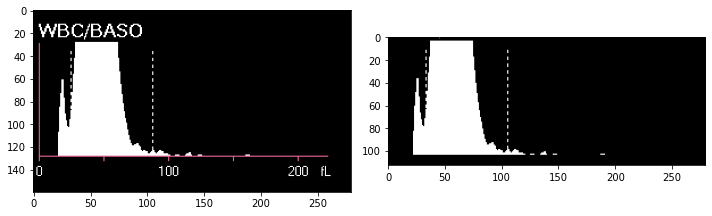

In [ ]:
process_different_image("/content/drive/My Drive/PE_Images/25.5.2020/20200525113102_AH X-I9929_WBC.bmp")

{'Date': '4.6.2020',
 'Filename': '20200604095002_AH X83S-I9962_WBC.bmp',
 'Percentage': {(1, 1, 1): '82.66%', (255, 255, 255): '17.34%'},
 'Total per Color': [(5486, (255, 255, 255)), (26154, (0, 0, 0))],
 'extcolors': ['82.66%', '17.34%']}

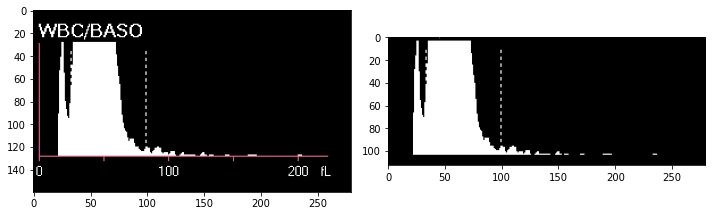

In [ ]:
process_different_image("/content/drive/My Drive/PE_Images/4.6.2020/20200604095002_AH X83S-I9962_WBC.bmp")

{'Date': '21.5.2020',
 'Filename': '20200521103347_AH X83S-L5006_WBC.bmp',
 'Percentage': {(1, 1, 1): '83.44%', (255, 255, 255): '16.56%'},
 'Total per Color': [(5240, (255, 255, 255)), (26400, (0, 0, 0))],
 'extcolors': ['83.44%', '16.56%']}

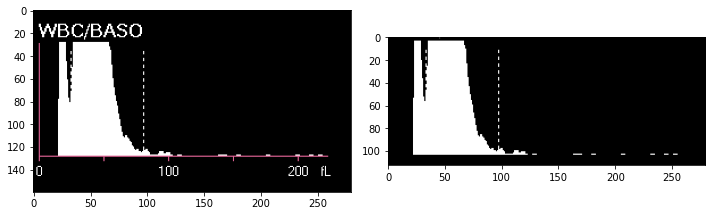

In [ ]:
process_different_image("/content/drive/My Drive/PE_Images/21.5.2020/20200521103347_AH X83S-L5006_WBC.bmp")

In [ ]:
dfproc = pd.DataFrame(processedImages)

In [ ]:
dfproc.to_csv("/content/drive/My Drive/PE_Images/dfproc.csv")

Extracted colors:
(1, 1, 1)      :  89.87% (28434)
(255, 255, 255):  10.13% (3206)

Pixels in output: 31640 of 31640
['89.87%', '10.13%']


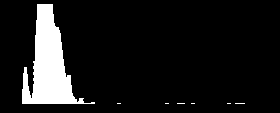

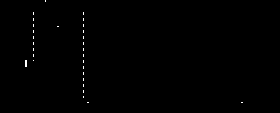

In [ ]:
#### Another approach that doesn't work as well

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def process_morph(imgPath):
  img = cv2.imread(imgPath)
  img = img[24:137,:]
  img_remove_axes = img.copy()
  img_remove_axes[np.all(img_remove_axes == (150., 100., 225.), axis=-1)] = (0,0,0)
  gray = cv2.cvtColor(img_remove_axes,cv2.COLOR_RGB2GRAY)
  
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 1))
  morph_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  out = cv2.bitwise_xor(morph_img, gray)
  
  imsample = Image.fromarray(morph_img)
  imsample.save('tmpMorph.png')
  !extcolors ./tmpMorph.png
  resterminal = !extcolors ./tmpMorph.png
  resstr = str(resterminal).split()
  resstr = [s for s in resstr if "%" in s]
  
  print(resstr)
  
  cv2_imshow(morph_img)
  cv2_imshow(out)

process_morph("/content/drive/My Drive/PE_Images/18.03.2020/20200318105001_83S-I9238_WBC.bmp")

cv2.findContours 

{'Filename': '20200318105001_83S-I9238_WBC.bmp', 'Total per Color': [(3229, (255, 255, 255)), (28411, (0, 0, 0))], 'Percentage': {(1, 1, 1): '89.79%', (255, 255, 255): '10.21%'}, 'extcolors': ['89.79%', '10.21%']}

cv2.morphologyEx 

Extracted colors:
(1, 1, 1)      :  89.87% (28434)
(255, 255, 255):  10.13% (3206)

Pixels in output: 31640 of 31640
['89.87%', '10.13%']


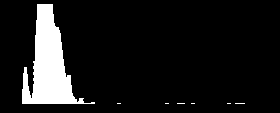

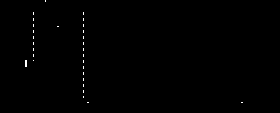

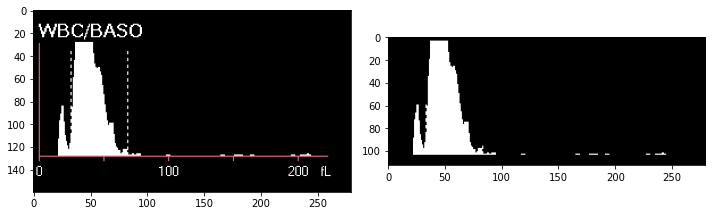

In [ ]:
#### Compare the last two approaches

samplePath = "/content/drive/My Drive/PE_Images/18.03.2020/20200318105001_83S-I9238_WBC.bmp"

print("cv2.findContours method:\n")
print(process_image(samplePath))
print("\ncv2.morphologyEx method: \n")
process_morph(samplePath)

That's it! Everything else below is mostly part of the playground for this project or alternate approaches that don't work as well.



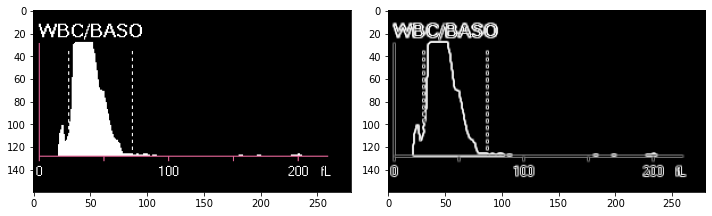

In [ ]:
#### Edge detection ####

from skimage import color
from skimage.filters import sobel
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

def show_subimage(image, sobel, title='Image', cmap_type='gray'):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
  axes[0].imshow(image, cmap=cmap_type)
  axes[1].imshow(sobel, cmap=cmap_type)
  fig.tight_layout()

test_image = plt.imread("/content/drive/My Drive/PE_Images/18.03.2020/20200318104226_83S-I9926_WBC.bmp")

# Convert the image to grayscale
test_image_gray = color.rgb2gray(test_image)

# Apply edge detection filter
edge_sobel = sobel(test_image_gray)

# Show the original and the resulting image
#show_image(test_image, "Original")
#show_image(edge_sobel, "Edges with Sobel")

show_subimage(test_image, edge_sobel)

{'#000000': [-1.1652900866465643e-11,
  1.5777601447553025e-11,
  1.1318945780658396e-11],
 '#e16395': [225.00000000000074, 99.99999999999952, 149.99999999999926],
 '#feffff': [254.99999999999045, 255.00000000001478, 255.0000000000112]}

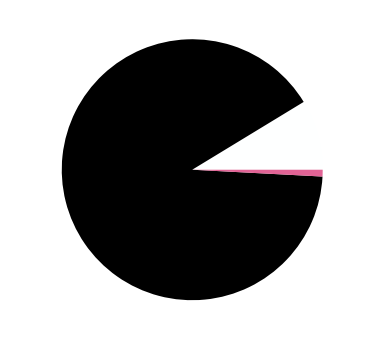

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart=True):
    modified_image = image.copy()
    #modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    rgb_colors_list = np.array(rgb_colors).tolist()

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors, textprops={'color':"w"})
    
    return dict(zip(hex_colors,rgb_colors_list))

get_colors(get_image("/content/drive/My Drive/PE_Images/18.03.2020/20200318104226_83S-I9926_WBC.bmp"), 3, True)

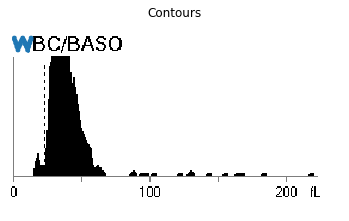

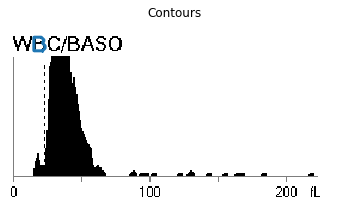

In [ ]:
from skimage import color, measure, filters, io

def show_image_contour(image, contours):
    plt.figure()
    
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
        plt.imshow(image, interpolation='nearest', cmap='gray_r')
        plt.title('Contours')
        plt.axis('off')
        plt.show()

sample_test_image = io.imread('/content/drive/My Drive/PE_Images/18.03.2020/20200318104442_83S-I9928_WBC.bmp')

# Convert the image to grayscale
sample_test_image = color.rgb2gray(sample_test_image)

# Obtain the optimal thresh value
thresh = filters.threshold_otsu(sample_test_image)

# Apply thresholding
binary = sample_test_image > thresh

# Find contours at a constant value
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image_contour(sample_test_image, contours[0:2])

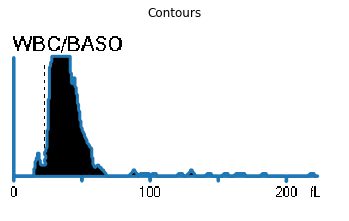

In [ ]:
plt.figure()
rcontour = contours[14]
plt.plot(rcontour[:, 1], rcontour[:, 0], linewidth=3)
plt.imshow(sample_test_image, interpolation='nearest', cmap='gray_r')
plt.title('Contours')
plt.axis('off')
plt.show()

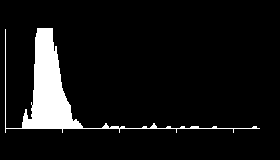

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/My Drive/PE_Images/18.03.2020/20200318104442_83S-I9928_WBC.bmp')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,gray = cv2.threshold(gray,127,255,0)
gray2 = gray.copy()

contours, hier = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    if not 200<cv2.contourArea(cnt)<5000:
        (x,y,w,h) = cv2.boundingRect(cnt)
        cv2.rectangle(gray2,(x,y),(x+w,y+h),0,-1)

cv2_imshow(gray2)
cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'numpy.ndarray'>


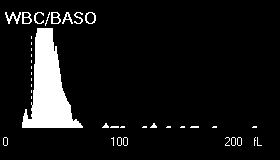

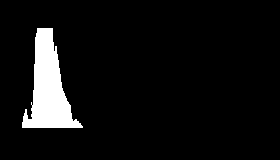

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

gray2 = 0
sampleIMG = cv2.imread("/content/drive/My Drive/PE_Images/18.03.2020/20200318104442_83S-I9928_WBC.bmp",cv2.COLOR_BGR2RGB)
print(type(sampleIMG))

sampleIMG[np.all(sampleIMG == (150., 100., 225.), axis=-1)] = (0,0,0)

gray = cv2.cvtColor(sampleIMG,cv2.COLOR_RGB2GRAY)
ret,gray = cv2.threshold(gray,127,255,0)
gray2 = gray.copy()

cv2_imshow(gray2)

contours, hier = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
  if not 200<cv2.contourArea(cnt)<5000:
    (x,y,w,h) = cv2.boundingRect(cnt)
    cv2.rectangle(gray2,(x,y),(x+w,y+h),0,-1)

cv2_imshow(gray2)